In [1]:
!pip install -U imbalanced-learn

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = 'creditcard.csv'  # Update this with the actual path to your file
df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2000 non-null   float64
 1   V1      2000 non-null   float64
 2   V2      2000 non-null   float64
 3   V3      2000 non-null   float64
 4   V4      2000 non-null   float64
 5   V5      2000 non-null   float64
 6   V6      2000 non-null   float64
 7   V7      2000 non-null   float64
 8   V8      2000 non-null   float64
 9   V9      2000 non-null   float64
 10  V10     2000 non-null   float64
 11  V11     2000 non-null   float64
 12  V12     2000 non-null   float64
 13  V13     2000 non-null   float64
 14  V14     2000 non-null   float64
 15  V15     2000 non-null   float64
 16  V16     2000 non-null   float64
 17  V17     2000 non-null   float64
 18  V18     2000 non-null   float64
 19  V19     2000 non-null   float64
 20  V20     2000 non-null   float64
 21  V21     2000 non-null   float64
 22  

In [6]:
class_distribution = df['Class'].value_counts()
print(class_distribution)

Class
0    1974
1      26
Name: count, dtype: int64


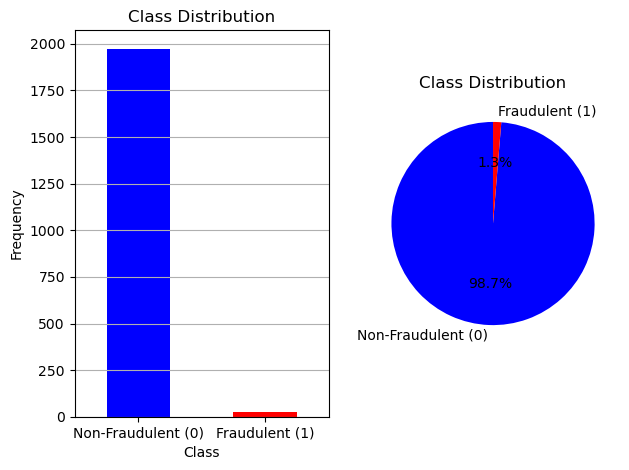

In [7]:
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.grid(axis='y')
# Plot the distribution of the 'Class' column as a pie chart
plt.subplot(1, 2, 2)
class_distribution.plot(kind='pie', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'], colors=['blue', 'red'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.ylabel('')
# Show the plots
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Standardize the feature variables
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

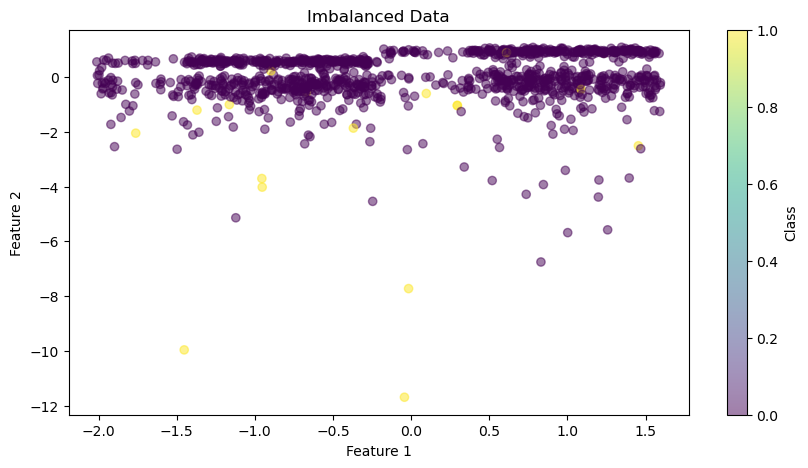

In [4]:
# Scatter plot for the imbalanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

In [5]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

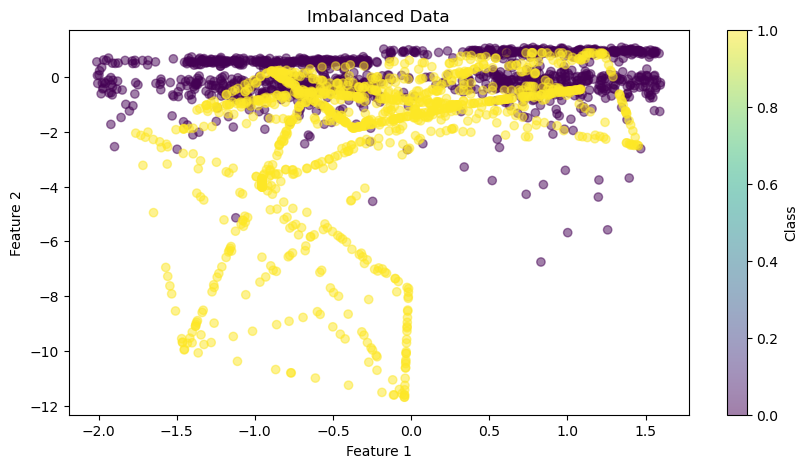

In [6]:
# Scatter plot for the imbalanced data
plt.figure(figsize=(10, 5))
plt.scatter(X_train_smote[:, 0], X_train_smote[:, 1], c=y_train_smote, alpha=0.5, cmap='viridis', marker='o')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')

In [7]:
# Train the Decision Tree Classifier with pruning
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth to 3
dt_classifier.fit(X_train_smote, y_train_smote)
# Predict on training set
y_train_pred = dt_classifier.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [8]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9945008460236887
Test Accuracy: 0.985


Confusion Matrix:
[[780  12]
 [  0   8]]


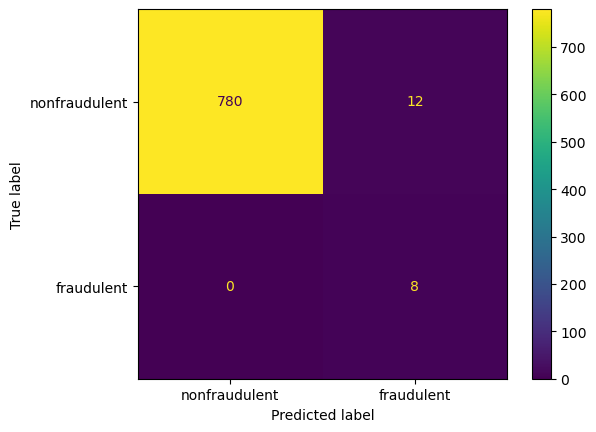

In [9]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["nonfraudulent", "fraudulent"])
# display matrix
cm_display.plot()
plt.show()

In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.40      1.00      0.57         8

    accuracy                           0.98       800
   macro avg       0.70      0.99      0.78       800
weighted avg       0.99      0.98      0.99       800



In [11]:
from imblearn.under_sampling import RandomUnderSampler

In [12]:
# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_sc, y_train)

In [14]:
X_train_undersampled

array([[ 1.44506827e+00,  9.29821089e-01, -1.01220637e-01, ...,
        -2.49504464e-01, -3.62350933e-01, -1.55266181e-01],
       [ 9.10674234e-01,  9.54553336e-01, -8.68676220e-02, ...,
        -6.52157642e-02, -3.55176884e-01, -3.30824750e-01],
       [-1.21298081e+00, -5.13007891e-01,  2.62917202e-01, ...,
        -1.03542758e+00, -1.71290090e+00,  1.70742732e-01],
       ...,
       [-1.76232015e+00, -2.05002045e+00,  1.62375505e+00, ...,
        -2.87562142e+00,  2.72408441e+00, -2.33343806e-01],
       [ 6.10472127e-01,  8.84656393e-01,  5.56294289e-01, ...,
         4.50609624e-02,  7.61154799e-02, -3.23461440e-01],
       [-9.55252638e-01, -3.70604636e+00,  3.69315089e+00, ...,
         2.48357421e+00,  8.40750991e-01, -2.49407266e-03]])

Text(0, 0.5, 'Feature 2')

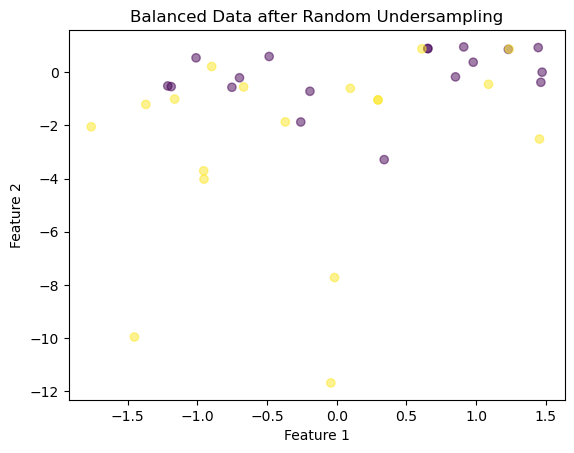

In [15]:
plt.scatter(X_train_undersampled[:, 0], X_train_undersampled[:, 1], c=y_train_undersampled, cmap="viridis", alpha=0.5, marker='o')
plt.title('Balanced Data after Random Undersampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [16]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_undersampled, y_train_undersampled)
# Predict on training set
y_train_pred = dt_classifier.predict(X_train_undersampled)
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)
# Predict on testing set
y_test_pred = dt_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [17]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 1.0
Test Accuracy: 0.8075


In [19]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
# Create a pipeline for proper cross-validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scales each feature to zero mean and unit variance
    ('sampler', RandomUnderSampler(random_state=42)),  # Balances the dataset by undersampling
    ('classifier', DecisionTreeClassifier(random_state=42))  # Applies a Decision Tree Classifier
])
# Perform cross-validation using the entire dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')
# Evaluate the model using precision, recall, and F1 score
print(classification_report(y_test, y_test_pred)) 

Cross-validation Accuracy: 0.876
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       792
           1       0.05      1.00      0.09         8

    accuracy                           0.81       800
   macro avg       0.52      0.90      0.49       800
weighted avg       0.99      0.81      0.88       800



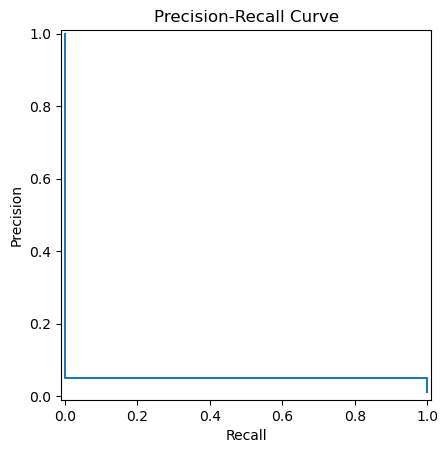

Area under the Precision-Recall Curve(AUCPR): 0.04938271604938271


In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
# Predict probabilities for the positive class
y_scores = dt_classifier.predict_proba(X_test_sc)[:, 1]
# Compute precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Use PrecisionRecallDisplay to plot the curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()
# Compute the average precision score (AUCPR)
aucpr = average_precision_score(y_test, y_scores)
print(f'Area under the Precision-Recall Curve(AUCPR): {aucpr}')

In [21]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [22]:
# Train the Balanced Random Forest Classifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)
brf_classifier.fit(X_train_sc, y_train)

C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [23]:
# Predict on training set
y_train_pred = brf_classifier.predict(X_train_sc)
train_accuracy = accuracy_score(y_train, y_train_pred)
# Predict on testing set
y_test_pred = brf_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [24]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.9883333333333333
Test Accuracy: 0.98125


In [25]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])
# Perform cross-validation using the entire dataset
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')
# Evaluate the model using precision, recall, and F1 score
print(classification_report(y_test, y_test_pred))

C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arsha\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\arsha

Cross-validation Accuracy: 0.9865
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       792
           1       0.35      1.00      0.52         8

    accuracy                           0.98       800
   macro avg       0.67      0.99      0.75       800
weighted avg       0.99      0.98      0.99       800



In [26]:
import imblearn
print(imblearn.__version__)

0.12.3
